# Noising Data to test how FAD is working

In [4]:
import os
import shutil
from tqdm import tqdm
import numpy as np
import soundfile as sf

In [10]:
def add_noise_to_waveform(data, noise_level=0.2):
    """ Add random noise to the waveform """
    noise = np.random.randn(*data.shape) * noise_level
    distorted_data = data + noise
    return distorted_data

def process_audio_files(src_directory, dst_directory):
    """ Process all .wav files in the source directory and save them to the destination directory with added noise """
    if not os.path.exists(dst_directory):
        os.makedirs(dst_directory)
    
    for filename in tqdm(os.listdir(src_directory)):
        if filename.endswith('.wav'):
            src_path = os.path.join(src_directory, filename)
            dst_path = os.path.join(dst_directory, filename)
            
            # Read audio file
            data, samplerate = sf.read(src_path)
            
            # Add noise to the audio data
            distorted_data = add_noise_to_waveform(data)
            
            # Save the distorted audio file
            sf.write(dst_path, distorted_data, samplerate)

In [11]:
# Directories
source_directory = '../cache/spotify_sleep_dataset/waveform_small'
destination_directory = '../cache/spotify_sleep_dataset/waveform_small_distorted_2'

# Process the audio files
process_audio_files(source_directory, destination_directory)

100%|██████████| 103/103 [00:18<00:00,  5.70it/s]


# Viewing Mel Specs

In [37]:
import pyarrow.parquet as pq
import pickle
import torch
from datasets import load_dataset, load_from_disk
from torchvision.transforms import Compose, Normalize, ToTensor

In [38]:
def load_my_dataset(dataset_path):
    # dataset_name = '../cache/spotify_sleep_dataset/waveform_small/mel_spectrogram_256_256'
    dataset_config_name = None
    vae = None

    dataset = load_from_disk(
        dataset_path,
        storage_options=dataset_config_name)["train"]
    
    train_batch_size = 16

    # Determine image resolution
    resolution = dataset[0]["image"].height, dataset[0]["image"].width

    augmentations = Compose([
        ToTensor(),
        Normalize([0.5], [0.5]),
    ])

    vqvae = None
    def transforms(examples):
        if vae is not None and vqvae.config["in_channels"] == 3:
            images = [
                augmentations(image.convert("RGB"))
                for image in examples["image"]
            ]
        else:
            images = [augmentations(image) for image in examples["image"]]
        if encodings is not None:
            encoding = [encodings[file] for file in examples["audio_file"]]
            return {"input": images, "encoding": encoding}
        return {"input": images}

    dataset.set_transform(transforms)
    train_dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=train_batch_size, shuffle=True)

    encodings = None
    if encodings is not None:
        encodings = pickle.load(open(encodings, "rb"))
        
    return dataset


In [39]:
import matplotlib.pyplot as plt
from PIL import Image

In [40]:
def show_image(index, dataset):
    # Access the image at the specified index
    item = dataset[index]
    # Convert the tensor image to a PIL image
    image_tensor = item["input"].squeeze(0)  # Remove batch dimension if present
    
    # Check if the image tensor has 3 dimensions (C, H, W)
    if image_tensor.dim() == 3:
        # Permute the dimensions to (H, W, C)
        image_tensor = image_tensor.permute(1, 2, 0)
    else:
        # Add an extra dimension to mimic grayscale as RGB (for consistent handling)
        image_tensor = image_tensor.unsqueeze(2).repeat(1, 1, 3)

    # Denormalize the image tensor
    print(image_tensor.shape)
    image_tensor = (image_tensor * 0.5 + 0.5) * 255
    print(image_tensor.shape)
    image = Image.fromarray(image_tensor.numpy().astype('uint8'))
    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()


### SSD 64x64 and 256x256

In [41]:
ssd_256_256_path = '../cache/spotify_sleep_dataset/waveform_small/mel_spectrogram_256_256'
ssd_256_256 = load_my_dataset(ssd_256_256_path)

ssd_64_64_path = '../cache/spotify_sleep_dataset/waveform_small/mel_spec_64_64'
ssd_64_64 = load_my_dataset(ssd_64_64_path)

In [43]:
len(ssd_64_64)

8020

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


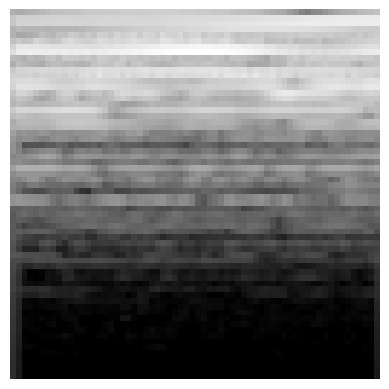

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


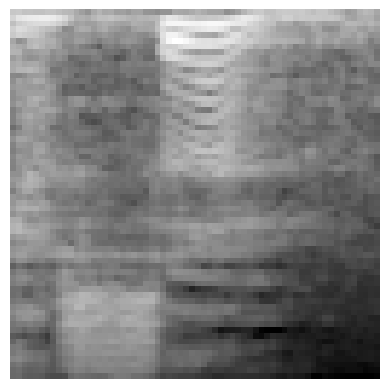

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


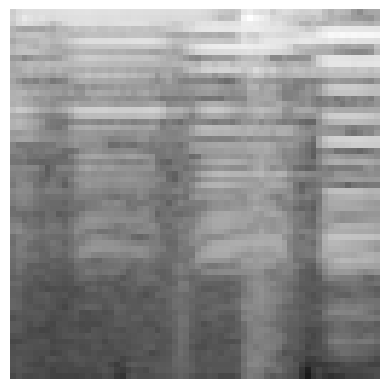

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


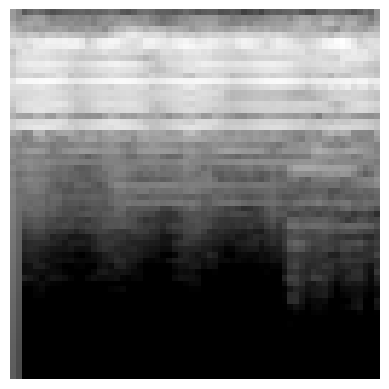

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


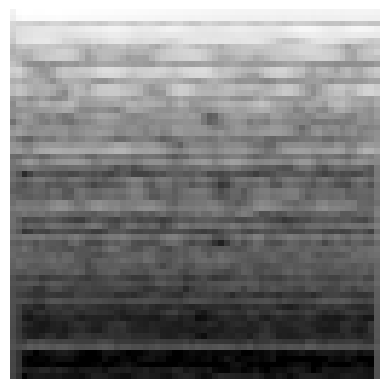

In [44]:
for i in random.sample(range(len(ssd_64_64)), 5):
    show_image(i, ssd_64_64)

### Drum samples 64x64

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


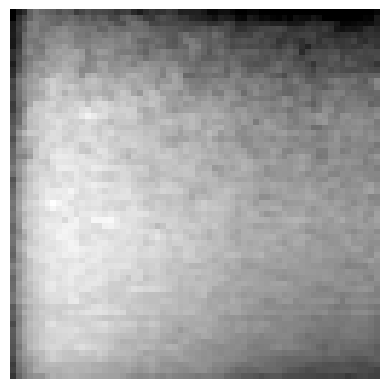

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


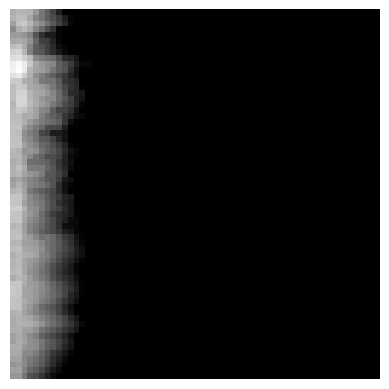

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


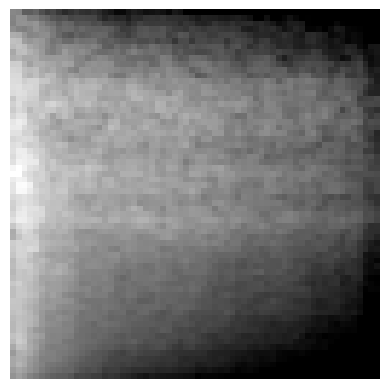

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


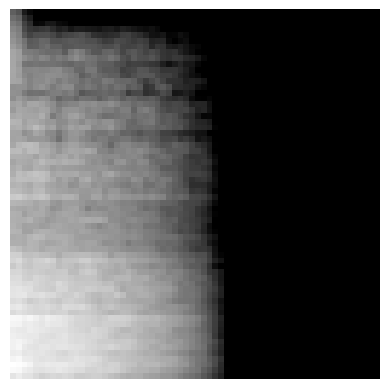

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


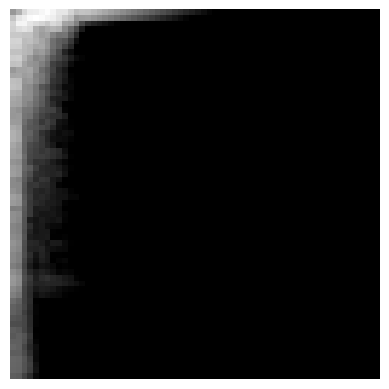

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


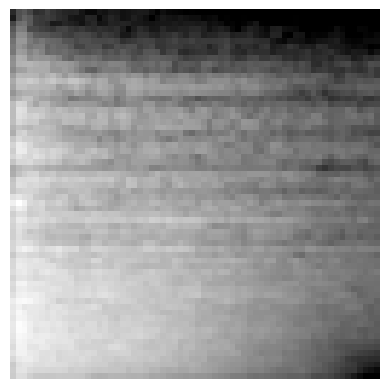

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


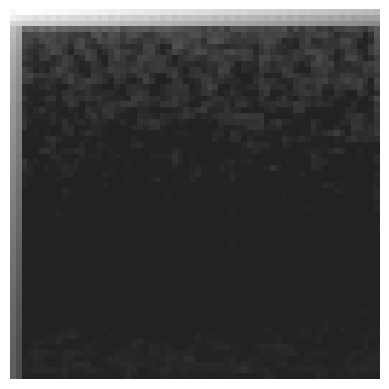

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


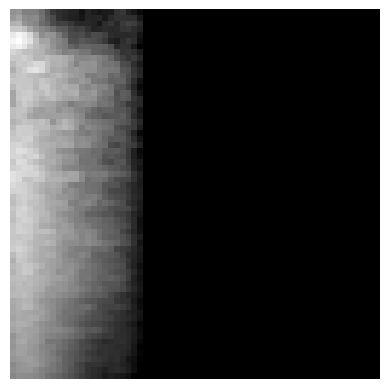

In [46]:
ds_64_64_path = '../cache/drum_samples/mel_spec_64_64'
ds_64_64 = load_my_dataset(ds_64_64_path)

for i in random.sample(range(len(ds_64_64)), 8):
    show_image(i, ds_64_64)

### Drum Samples 64x256

torch.Size([256, 64, 3])
torch.Size([256, 64, 3])


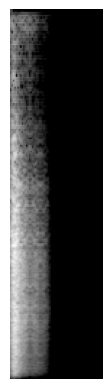

torch.Size([256, 64, 3])
torch.Size([256, 64, 3])


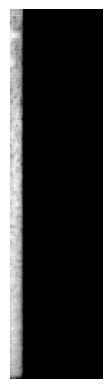

torch.Size([256, 64, 3])
torch.Size([256, 64, 3])


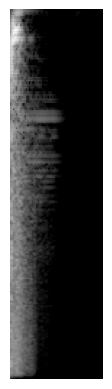

torch.Size([256, 64, 3])
torch.Size([256, 64, 3])


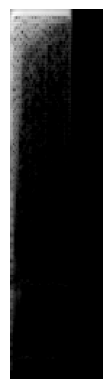

torch.Size([256, 64, 3])
torch.Size([256, 64, 3])


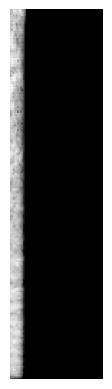

torch.Size([256, 64, 3])
torch.Size([256, 64, 3])


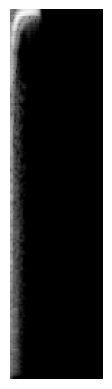

torch.Size([256, 64, 3])
torch.Size([256, 64, 3])


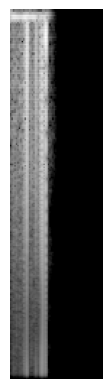

torch.Size([256, 64, 3])
torch.Size([256, 64, 3])


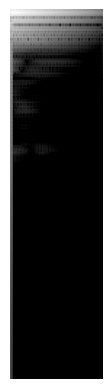

In [47]:
ds_64_256_path = '../cache/drum_samples/mel_spec_64_256'
ds_64_256 = load_my_dataset(ds_64_256_path)

for i in random.sample(range(len(ds_64_256)), 8):
    show_image(i, ds_64_256)

# Drums Dataset

In [1]:
import os
from datasets import load_dataset

/home/th716/.conda/envs/audiodiff_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def download_and_save_dataset(dataset_name, save_path):
    # Create the directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)
    
    # Load the dataset from Hugging Face
    dataset = load_dataset(dataset_name)

    # Loop through each item in the dataset
    for idx, item in enumerate(dataset['train']):
        # Extract the audio file path from the dataset
        audio_file_path = item['audio']['path']
        
        # Define the path to save the audio file
        file_save_path = os.path.join(save_path, f"sample_{idx}.wav")
        
        # Copy the file from the dataset path to the specified save path
        os.rename(audio_file_path, file_save_path)
        print(f"Saved: {file_save_path}")


In [4]:
dataset_name = 'crlandsc/tiny-audio-diffusion-drums'
dataset = load_dataset(dataset_name)

Generating train split: 100%|██████████| 1546/1546 [00:00<00:00, 15022.17 examples/s]


In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['audio', 'label'],
        num_rows: 1546
    })
})

In [7]:
save_path = '../cache/drum_samples/waveform/'

for idx, item in enumerate(dataset['train']):
    # Extract the audio file path from the dataset
    audio_file_path = item['audio']['path']
    
    # Define the path to save the audio file
    file_save_path = os.path.join(save_path, f"sample_{idx}.wav")
    
    # Copy the file from the dataset path to the specified save path
    os.rename(audio_file_path, file_save_path)
    print(f"Saved: {file_save_path}")


Saved: ../cache/drum_samples/waveform/sample_0.wav
Saved: ../cache/drum_samples/waveform/sample_1.wav
Saved: ../cache/drum_samples/waveform/sample_2.wav
Saved: ../cache/drum_samples/waveform/sample_3.wav
Saved: ../cache/drum_samples/waveform/sample_4.wav
Saved: ../cache/drum_samples/waveform/sample_5.wav
Saved: ../cache/drum_samples/waveform/sample_6.wav
Saved: ../cache/drum_samples/waveform/sample_7.wav
Saved: ../cache/drum_samples/waveform/sample_8.wav
Saved: ../cache/drum_samples/waveform/sample_9.wav
Saved: ../cache/drum_samples/waveform/sample_10.wav
Saved: ../cache/drum_samples/waveform/sample_11.wav
Saved: ../cache/drum_samples/waveform/sample_12.wav
Saved: ../cache/drum_samples/waveform/sample_13.wav
Saved: ../cache/drum_samples/waveform/sample_14.wav
Saved: ../cache/drum_samples/waveform/sample_15.wav
Saved: ../cache/drum_samples/waveform/sample_16.wav
Saved: ../cache/drum_samples/waveform/sample_17.wav
Saved: ../cache/drum_samples/waveform/sample_18.wav
Saved: ../cache/drum_s

In [4]:
# Define the dataset name and the path where the files will be saved
dataset_name = 'crlandsc/tiny-audio-diffusion-drums'
save_path = '../cache/drum_samples/waveform/'

# Call the function to download and save the dataset
download_and_save_dataset(dataset_name, save_path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/th716/.cache/huggingface/datasets/downloads/696b666250d919d854885597ba0e166f8555bcad155a5d5a6c358fedf1ba4ea6'